In [1]:
import pandas as pd
import numpy as np
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.simplefilter('ignore')
import statistics as stats

In [2]:
data = pd.read_csv('no_missing_values/sample_pow_cons.csv')
data.drop(columns='Unnamed: 0',axis=1,inplace=True)
data.head()

Global_active_power  Global_reactive_power  Voltage  Global_intensity  \
0                3.322                  0.204   238.70              14.2   
1                0.328                  0.232   241.38               1.6   
2                0.298                  0.112   245.59               1.2   
3                0.082                  0.000   241.01               0.2   
4                0.336                  0.078   245.62               1.4   

             date_time  meterings  
0  2009-04-13 21:18:00       35.0  
1  2008-05-17 03:59:00        1.0  
2  2007-01-24 01:41:00        0.0  
3  2008-08-25 23:04:00        1.0  
4  2008-12-18 04:44:00        1.0

In [24]:
data.describe()

Global_active_power  Global_reactive_power       Voltage  \
count         14825.000000           14825.000000  14825.000000   
mean              1.096217               0.124692    240.862872   
std               1.066980               0.113172      3.210986   
min               0.078000               0.000000    226.180000   
25%               0.308000               0.048000    239.030000   
50%               0.604000               0.102000    240.990000   
75%               1.526000               0.196000    242.910000   
max               8.928000               1.108000    253.070000   

       Global_intensity     meterings  
count      14825.000000  14825.000000  
mean           4.644465      8.798921  
std            4.483520     12.887056  
min            0.200000      0.000000  
25%            1.400000      0.000000  
50%            2.600000      1.000000  
75%            6.400000     18.000000  
max           38.800000    121.000000

In [3]:
cols1 = ['Global_active_power', 'Global_reactive_power', 'Voltage','Global_intensity','meterings']

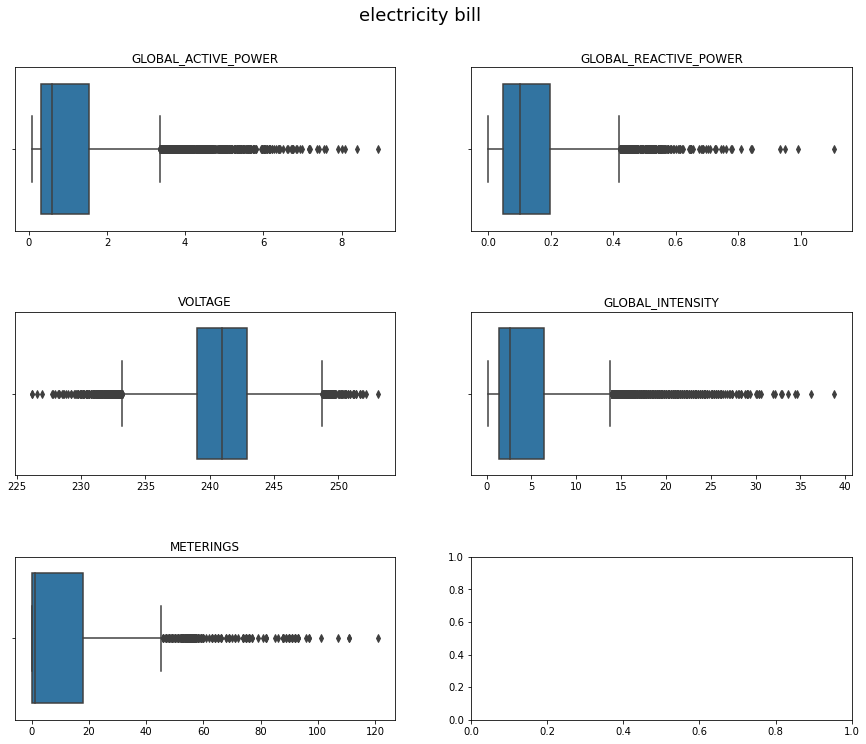

In [4]:
fig, axs = plt.subplots(nrows=3, ncols=2, figsize=(15, 12))
plt.subplots_adjust(hspace=0.5)
fig.suptitle("electricity bill", fontsize=18, y=0.95)

for col, ax in zip(cols1, axs.ravel()):
    sns.boxplot(data[col],ax=ax)

    ax.set_title(col.upper())
    ax.set_xlabel("")

plt.show()

In [5]:
for i in cols1:
    print('for col:',i)
    print("Highest allowed",data[i].mean() + 3*data[i].std())
    print("Lowest allowed",data[i].mean() - 3*data[i].std())
    print('----------------------------------------------------------------------')

for col: Global_active_power
Highest allowed 4.2971575005411005
Lowest allowed -2.104723908635534
----------------------------------------------------------------------
for col: Global_reactive_power
Highest allowed 0.46420714990905015
Lowest allowed -0.2148230015110731
----------------------------------------------------------------------
for col: Voltage
Highest allowed 250.49583055808355
Lowest allowed 231.22991244360438
----------------------------------------------------------------------
for col: Global_intensity
Highest allowed 18.095025385160522
Lowest allowed -8.806094525126799
----------------------------------------------------------------------
for col: meterings
Highest allowed 47.460087257187546
Lowest allowed -29.862245773207782
----------------------------------------------------------------------


In [6]:
highest_allowed = []
lowest_allowed = []
for i in cols1:
    highest_allowed.append(data[i].mean() + 3*data[i].std())
    lowest_allowed.append(data[i].mean() - 3*data[i].std())

In [7]:
j = 0
for i in cols1:
    df = data[(data[i] > lowest_allowed[j]) & (data[i] < highest_allowed[j])]
    j=+1

<AxesSubplot:xlabel='Global_active_power'>

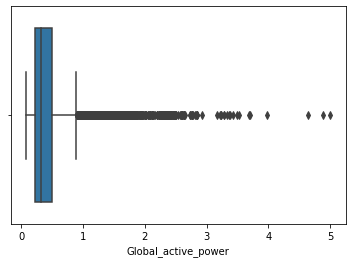

In [8]:
sns.boxplot(df['Global_active_power'])

<AxesSubplot:xlabel='Global_active_power'>

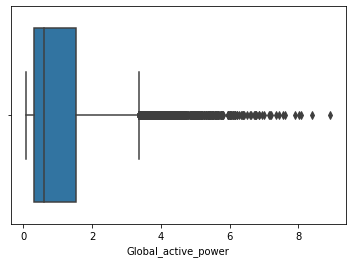

In [9]:
sns.boxplot(data['Global_active_power'])

This method is not so much effective
### Using IQR based filtering

In [10]:
p25_gap = data['Global_active_power'].quantile(0.25)
p75_gap = data['Global_active_power'].quantile(0.75)

In [11]:
# First quartile (Q1)
Q1 = np.percentile(data['Global_active_power'], 25, interpolation = 'midpoint')
  
# Third quartile (Q3)
Q3 = np.percentile(data['Global_active_power'], 75, interpolation = 'midpoint')

In [12]:
IQR = Q3 - Q1

In [13]:
ulim_gap = p75_gap + 1.5 * IQR
llim_gap = p25_gap - 1.5 * IQR

In [14]:
data[data['Global_active_power'] > ulim_gap]
# data[data['Global_active_power'] < llim_gap]

Global_active_power  Global_reactive_power  Voltage  Global_intensity  \
13                   5.766                  0.188   233.57              24.6   
23                   5.076                  0.150   238.87              21.2   
36                   4.208                  0.590   238.40              17.8   
55                   3.784                  0.000   238.68              16.0   
71                   3.690                  0.172   238.91              15.4   
...                    ...                    ...      ...               ...   
14690                4.412                  0.168   233.94              19.0   
14744                3.500                  0.350   237.50              14.8   
14790                4.912                  0.344   234.45              21.0   
14800                4.896                  0.212   234.46              21.6   
14815                5.116                  0.378   230.58              22.2   

                 date_time  meterings  
13     2009-11-04 11:06:00       88.0  
23     2009-09-04 21:08:00       62.0  
36     2009-12-12 17:07:00       35.0  
55     2008-04-02 07:35:00       17.0  
71     2010-06-21 22:06:00       39.0  
...                    ...        ...  
14690  2007-04-03 20:07:00       42.0  
14744  2009-10-22 07:02:00       28.0  
14790  2007-09-26 21:38:00       36.0  
14800  2008-10-18 20:37:00       17.0  
14815  2009-05-12 20:05:00       54.0  

[710 rows x 6 columns]

In [15]:
new_df = data[data['Global_active_power'] < ulim_gap]
new_df.shape

(14115, 6)

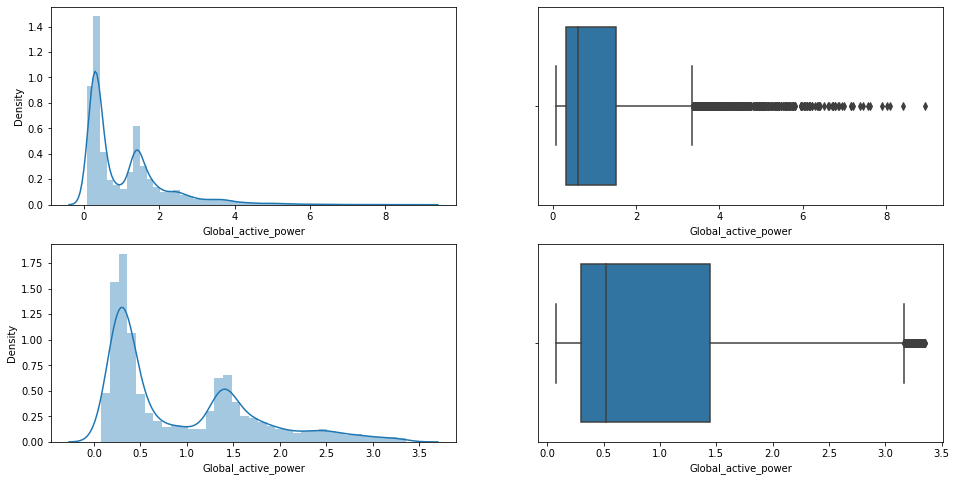

In [16]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(data['Global_active_power'])
plt.subplot(2,2,2)
sns.boxplot(data['Global_active_power'])
plt.subplot(2,2,3)
sns.distplot(new_df['Global_active_power'])
plt.subplot(2,2,4)
sns.boxplot(new_df['Global_active_power'])
plt.show()

So there are changes, we're progressing, there are less outliers in the 'Global_active_power' column than there were before, lets do the whole proces for all the other features.

In [17]:
cols1

['Global_active_power',
 'Global_reactive_power',
 'Voltage',
 'Global_intensity',
 'meterings']

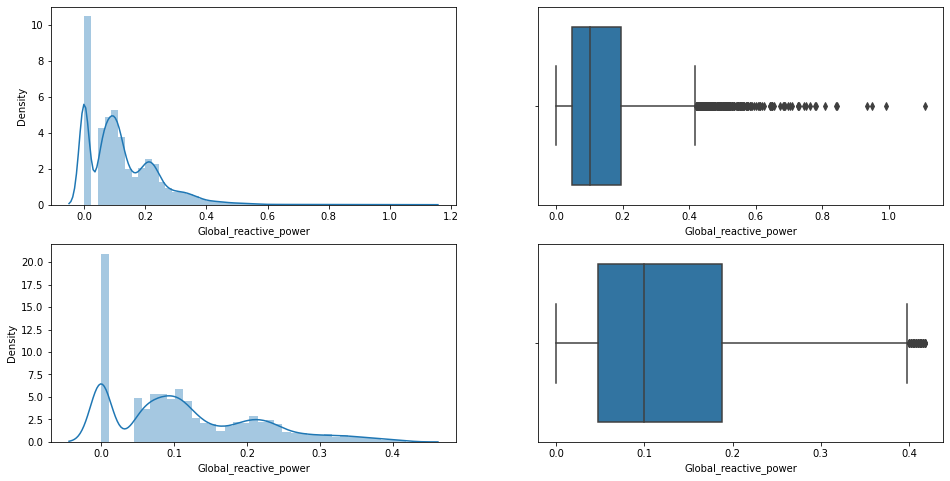

In [18]:
p25_gap = data['Global_reactive_power'].quantile(0.25)
p75_gap = data['Global_reactive_power'].quantile(0.75)

# First quartile (Q1)
Q1 = np.percentile(data['Global_reactive_power'], 25, interpolation = 'midpoint')
  
# Third quartile (Q3)
Q3 = np.percentile(data['Global_reactive_power'], 75, interpolation = 'midpoint')

IQR = Q3 - Q1

ulim_gap = p75_gap + 1.5 * IQR
llim_gap = p25_gap - 1.5 * IQR

data[data['Global_reactive_power'] > ulim_gap]
# data[data['Global_reactive_power'] < llim_gap]

new_df = data[data['Global_reactive_power'] < ulim_gap]
new_df.shape

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(data['Global_reactive_power'])
plt.subplot(2,2,2)
sns.boxplot(data['Global_reactive_power'])
plt.subplot(2,2,3)
sns.distplot(new_df['Global_reactive_power'])
plt.subplot(2,2,4)
sns.boxplot(new_df['Global_reactive_power'])
plt.show()

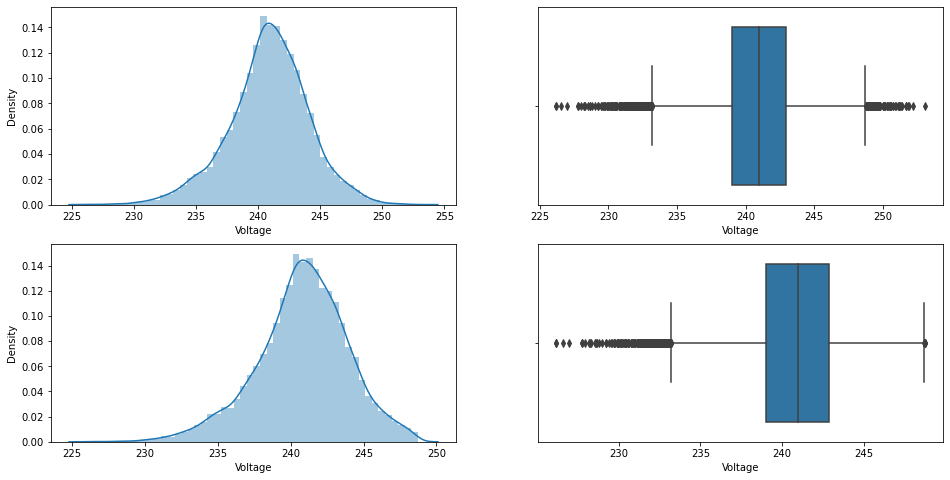

In [19]:
p25_gap = data['Voltage'].quantile(0.25)
p75_gap = data['Voltage'].quantile(0.75)

# First quartile (Q1)
Q1 = np.percentile(data['Voltage'], 25, interpolation = 'midpoint')
  
# Third quartile (Q3)
Q3 = np.percentile(data['Voltage'], 75, interpolation = 'midpoint')

IQR = Q3 - Q1

ulim_gap = p75_gap + 1.5 * IQR
llim_gap = p25_gap - 1.5 * IQR

data[data['Voltage'] > ulim_gap]
# data[data['Voltage'] < llim_gap]

new_df = data[data['Voltage'] < ulim_gap]
new_df.shape

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(data['Voltage'])
plt.subplot(2,2,2)
sns.boxplot(data['Voltage'])
plt.subplot(2,2,3)
sns.distplot(new_df['Voltage'])
plt.subplot(2,2,4)
sns.boxplot(new_df['Voltage'])
plt.show()

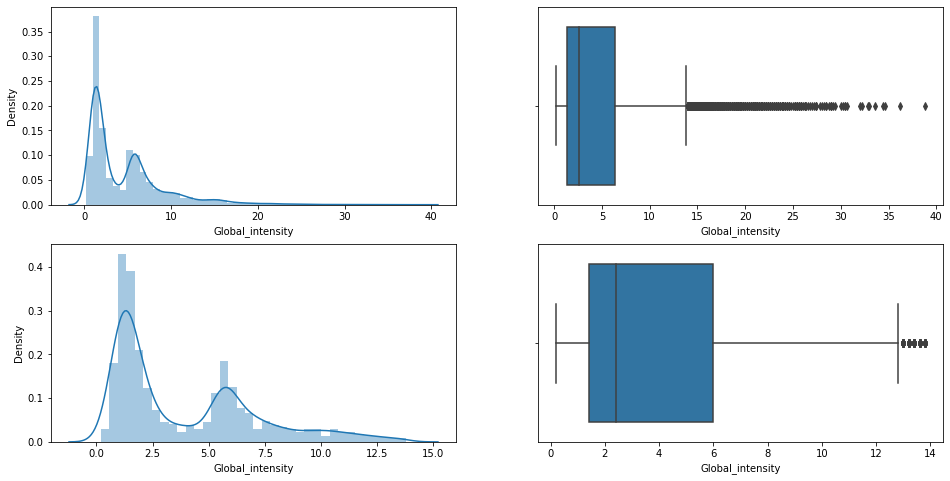

In [20]:
p25_gap = data['Global_intensity'].quantile(0.25)
p75_gap = data['Global_intensity'].quantile(0.75)

# First quartile (Q1)
Q1 = np.percentile(data['Global_intensity'], 25, interpolation = 'midpoint')
  
# Third quartile (Q3)
Q3 = np.percentile(data['Global_intensity'], 75, interpolation = 'midpoint')

IQR = Q3 - Q1

ulim_gap = p75_gap + 1.5 * IQR
llim_gap = p25_gap - 1.5 * IQR

data[data['Global_intensity'] > ulim_gap]
# data[data['Global_intensity'] < llim_gap]

new_df = data[data['Global_intensity'] < ulim_gap]
new_df.shape

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(data['Global_intensity'])
plt.subplot(2,2,2)
sns.boxplot(data['Global_intensity'])
plt.subplot(2,2,3)
sns.distplot(new_df['Global_intensity'])
plt.subplot(2,2,4)
sns.boxplot(new_df['Global_intensity'])
plt.show()

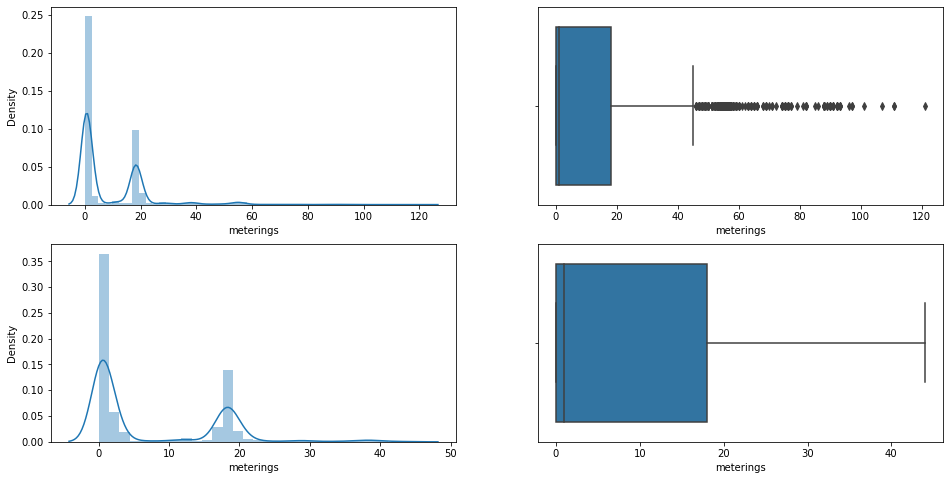

In [21]:
p25_gap = data['meterings'].quantile(0.25)
p75_gap = data['meterings'].quantile(0.75)

# First quartile (Q1)
Q1 = np.percentile(data['meterings'], 25, interpolation = 'midpoint')
  
# Third quartile (Q3)
Q3 = np.percentile(data['meterings'], 75, interpolation = 'midpoint')

IQR = Q3 - Q1

ulim_gap = p75_gap + 1.5 * IQR
llim_gap = p25_gap - 1.5 * IQR

data[data['meterings'] > ulim_gap]
# data[data['meterings'] < llim_gap]

new_df = data[data['meterings'] < ulim_gap]
new_df.shape

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(data['meterings'])
plt.subplot(2,2,2)
sns.boxplot(data['meterings'])
plt.subplot(2,2,3)
sns.distplot(new_df['meterings'])
plt.subplot(2,2,4)
sns.boxplot(new_df['meterings'])
plt.show()

In [22]:
new_df

Global_active_power  Global_reactive_power  Voltage  Global_intensity  \
0                    3.322                  0.204   238.70              14.2   
1                    0.328                  0.232   241.38               1.6   
2                    0.298                  0.112   245.59               1.2   
3                    0.082                  0.000   241.01               0.2   
4                    0.336                  0.078   245.62               1.4   
...                    ...                    ...      ...               ...   
14820                1.606                  0.312   240.42               6.8   
14821                0.334                  0.052   245.61               1.6   
14822                0.144                  0.000   239.76               0.6   
14823                0.264                  0.192   236.11               1.4   
14824                0.426                  0.356   242.92               2.2   

                 date_time  meterings  
0      2009-04-13 21:18:00       35.0  
1      2008-05-17 03:59:00        1.0  
2      2007-01-24 01:41:00        0.0  
3      2008-08-25 23:04:00        1.0  
4      2008-12-18 04:44:00        1.0  
...                    ...        ...  
14820  2007-07-15 21:21:00       19.0  
14821  2007-11-20 16:47:00        1.0  
14822  2008-02-09 02:32:00        1.0  
14823  2007-09-05 01:24:00        1.0  
14824  2009-09-15 01:45:00        2.0  

[14397 rows x 6 columns]

In [23]:
new_df.describe()

Global_active_power  Global_reactive_power       Voltage  \
count         14397.000000           14397.000000  14397.000000   
mean              0.995290               0.122642    240.981193   
std               0.887389               0.111059      3.142006   
min               0.078000               0.000000    226.180000   
25%               0.304000               0.048000    239.200000   
50%               0.556000               0.100000    241.080000   
75%               1.474000               0.192000    242.970000   
max               6.704000               1.108000    253.070000   

       Global_intensity     meterings  
count      14397.000000  14397.000000  
mean           4.217031      7.315899  
std            3.710276      9.513796  
min            0.200000      0.000000  
25%            1.400000      0.000000  
50%            2.400000      1.000000  
75%            6.200000     18.000000  
max           29.000000     44.000000

In [25]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14397 entries, 0 to 14824
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Global_active_power    14397 non-null  float64
 1   Global_reactive_power  14397 non-null  float64
 2   Voltage                14397 non-null  float64
 3   Global_intensity       14397 non-null  float64
 4   date_time              14397 non-null  object 
 5   meterings              14397 non-null  float64
dtypes: float64(5), object(1)
memory usage: 787.3+ KB


In [27]:
new_df.duplicated().sum()

0

In [29]:
new_df.isnull().sum()

Global_active_power      0
Global_reactive_power    0
Voltage                  0
Global_intensity         0
date_time                0
meterings                0
dtype: int64

In [30]:
new_df.shape

(14397, 6)

Now we can finally export a csv without outliers
### Exporting CSV

In [31]:
import os
os.makedirs('no_outliers')
new_df.to_csv('no_outliers/pow_cons_new1.csv')